   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  True_Label Predicted_Label  
0     setosa          setosa  
1     setosa          setosa  
2     setosa          setosa  
3     

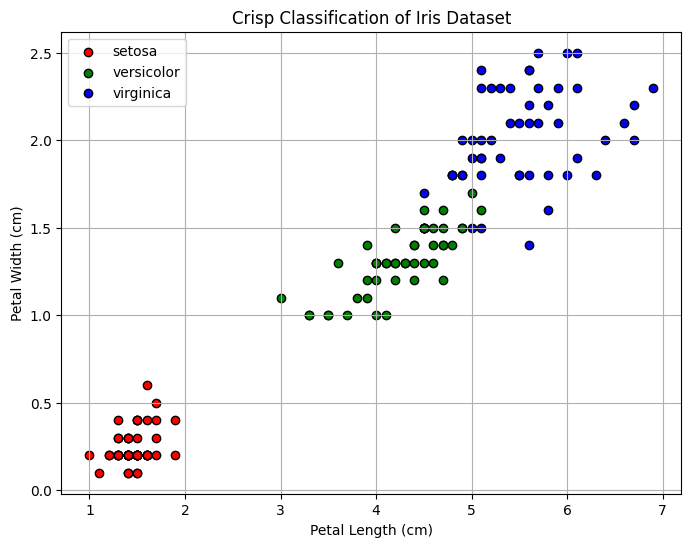

In [2]:
# crisp set
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

clf = DecisionTreeClassifier()
clf.fit(X, y)


predictions = clf.predict(X)

df = pd.DataFrame(X, columns=iris.feature_names)
df['True_Label'] = [target_names[i] for i in y]
df['Predicted_Label'] = [target_names[i] for i in predictions]

print(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)',
          'True_Label', 'Predicted_Label']].head(10))


plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(
        X[predictions == i, 2],
        X[predictions == i, 3],
        color=colors[i],
        label=target_name,
        edgecolor='k'
    )

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Crisp Classification of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

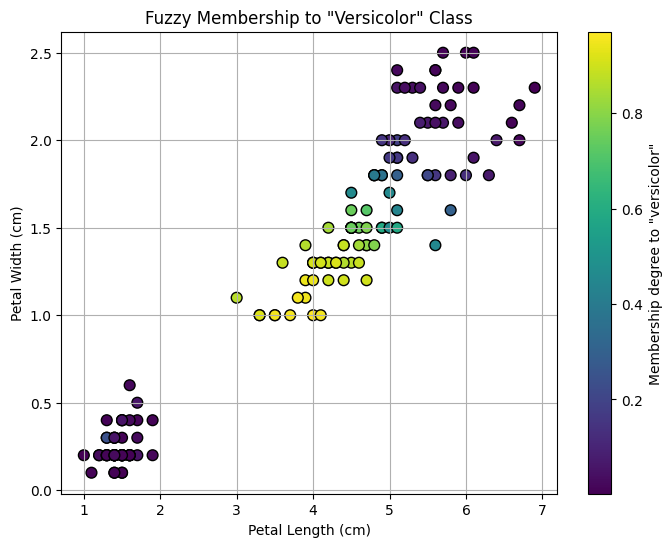

In [3]:
#fuzzy set
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegression(max_iter=200)
clf.fit(X_scaled, y)
probs = clf.predict_proba(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X[:, 2],
    X[:, 3],
    c=probs[:, 1],
    cmap='viridis',
    edgecolor='k',
    s=60
)

plt.colorbar(scatter, label='Membership degree to "versicolor"')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Fuzzy Membership to "Versicolor" Class')
plt.grid(True)
plt.show()
